# Pivot Point Indicators

https://en.wikipedia.org/wiki/Pivot_point_(technical_analysis)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:pivot_points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'msft'
market = '^gspc'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
dataset = yf.download(symbol,start,end)
benchmark = yf.download(market,start,end)

# View Columns
dataset.head()
benchmark.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03 00:00:00-05:00,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06 00:00:00-05:00,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07 00:00:00-05:00,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08 00:00:00-05:00,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [3]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

# Stock Pivot Points

## Standard Pivot Points

In [4]:
# Floor Pivot Points (Basic Pivot Points) - Support and Resistance
# https://www.investopedia.com/trading/using-pivot-points-for-predictions/
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)  
R1 = pd.Series(2 * PP - dataset['Low'])  
S1 = pd.Series(2 * PP - dataset['High'])  
R2 = pd.Series(PP + dataset['High'] - dataset['Low'])  
S2 = pd.Series(PP - dataset['High'] + dataset['Low'])  
R3 = pd.Series(dataset['High'] + 2 * (PP - dataset['Low']))  
S3 = pd.Series(dataset['Low'] - 2 * (dataset['High'] - PP))
R4 = pd.Series(dataset['High'] + 3 * (PP - dataset['Low']))  
S4 = pd.Series(dataset['Low'] - 3 * (dataset['High'] - PP))
R5 = pd.Series(dataset['High'] + 4 * (PP - dataset['Low']))  
S5 = pd.Series(dataset['Low'] - 4 * (dataset['High'] - PP))
P = pd.Series((dataset['Open'] + (dataset['High'] + dataset['Low'] + dataset['Close'])) / 4) # Opening Price Formula
psr = {'P':P, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3,'R4':R4, 'S4':S4,'R5':R5, 'S5':S5}  
PSR = pd.DataFrame(psr)  
dataset = dataset.join(PSR)
print(dataset.head())

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  158.779999  160.729996  158.330002  160.619995   
2020-01-03 00:00:00-05:00  158.320007  159.949997  158.059998  158.619995   
2020-01-06 00:00:00-05:00  157.080002  159.100006  156.509995  159.029999   
2020-01-07 00:00:00-05:00  159.320007  159.669998  157.320007  157.580002   
2020-01-08 00:00:00-05:00  158.929993  160.800003  157.949997  160.089996   

                            Adj Close    Volume   Returns           P  \
Date                                                                    
2020-01-02 00:00:00-05:00  155.761810  22622100       NaN  159.614998   
2020-01-03 00:00:00-05:00  153.822296  21116200 -0.012452  158.737499   
2020-01-06 00:00:00-05:00  154.219894  20813700  0.002585  157.930000   
2020-01-07 00:00:00-05:00  152.813782  21634100 -0.009118  158.472504   
2020-01-08 00:00:00-05

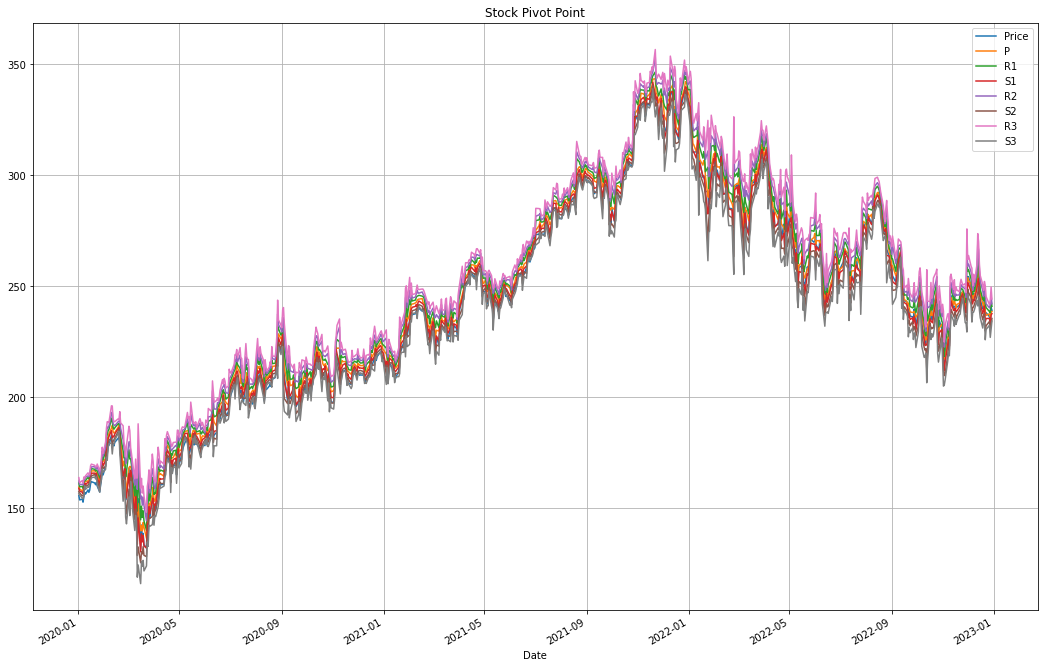

In [5]:
# labels = ['Price','P','R1','S1','R2','S2','R3','S3']
pivot_point = pd.concat([dataset['Adj Close'],P,R1,S1,R2,S2,R3,S3],axis=1).plot(figsize=(18,12),grid=True)
plt.title('Stock Pivot Point')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()

## Woodie's Pivot Points

In [6]:
# Woodie's Pivot Points
P = pd.Series((dataset['High'] + dataset['Low'] + 2*dataset['Close']) / 4)  
R1 = pd.Series(2 * P - dataset['Low'])  
S1 = pd.Series(2 * P - dataset['High'])  
R2 = pd.Series(P + dataset['High'] - dataset['Low'])  
S2 = pd.Series(P - dataset['High'] + dataset['Low'])  
wpp = {'P':P, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2}  
WPP = pd.DataFrame(wpp)  
# dataset = dataset.join(WPP)  

In [7]:
WPP.head()

,P,R1,S1,R2,S2
Date,,,,,
2020-01-02 00:00:00-05:00,160.074997,161.819992,159.419998,162.474991,157.675003
2020-01-03 00:00:00-05:00,158.812496,159.564995,157.674995,160.702496,156.922497
2020-01-06 00:00:00-05:00,158.417500,160.325005,157.734993,161.007511,155.827488
2020-01-07 00:00:00-05:00,158.037502,158.754997,156.405006,160.387493,155.687511
2020-01-08 00:00:00-05:00,159.732498,161.514999,158.664993,162.582504,156.882492


## Camarilla's Pivot Points

In [8]:
# Camarilla's Pivot Points
R1 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (2+dataset['Close']))  
R2 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (4+dataset['Close']))  
R3 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (6+dataset['Close']))  
R4 = pd.Series((dataset['High'] - dataset['Low']) * 1.1 / (12+dataset['Close']))    
S1 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/12)  
S2 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/6) 
S3 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/4)  
S4 = pd.Series((dataset['Close'] - (dataset['High']-dataset['Low']) * 1.1)/2) 
cpp = {'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3,'R4':R4, 'S4':S4}  
CPP = pd.DataFrame(cpp)  
# dataset = dataset.join(CPP)  

In [9]:
CPP.head()

,R1,S1,R2,S2,R3,S3,R4,S4
Date,,,,,,,,
2020-01-02 00:00:00-05:00,0.016234,13.165000,0.016037,26.330000,0.015844,39.495000,0.015294,78.990001
2020-01-03 00:00:00-05:00,0.012944,13.045083,0.012784,26.090166,0.012629,39.135249,0.012185,78.270498
2020-01-06 00:00:00-05:00,0.017692,13.015082,0.017475,26.030164,0.017264,39.045247,0.016658,78.090493
2020-01-07 00:00:00-05:00,0.016199,12.916251,0.015998,25.832502,0.015803,38.748753,0.015243,77.497506
2020-01-08 00:00:00-05:00,0.019341,13.079582,0.019105,26.159165,0.018875,39.238747,0.018217,78.477495


## Tom DeMark's

In [10]:
# Tom DeMark's
dataset = yf.download(symbol,start,end)

h_l_c = dataset['Close'] < dataset['Open']
h_lc = dataset['Close'] > dataset['Open']
hl_c = dataset['Close'] == dataset['Open']
P = np.zeros(len(dataset['Close']))
P[h_l_c] = dataset['High'][h_l_c] + 2.0 * dataset['Low'][h_l_c] + dataset['Close'][h_l_c]
P[h_lc] = 2.0 * dataset['High'][h_lc] + dataset['Low'][h_lc] + dataset['Close'][h_lc]
P[hl_c] = dataset['High'][hl_c] + dataset['Low'][hl_c] + 2.0 * dataset['Close'][hl_c]
S1 = P / 2.0 - dataset['High']
R1 = P / 2.0 - dataset['Low']
P = P / 4.0
tdm = {'P': P, 'S1': S1, 'R1': R1}
TDM = pd.DataFrame(tdm)

[*********************100%***********************]  1 of 1 completed


In [11]:
TDM.head()

,P,S1,R1
Date,,,
2020-01-02 00:00:00-05:00,160.102497,159.474998,161.874992
2020-01-03 00:00:00-05:00,159.144997,158.339996,160.229996
2020-01-06 00:00:00-05:00,158.435001,157.769997,160.360008
2020-01-07 00:00:00-05:00,157.972504,156.275009,158.625000
2020-01-08 00:00:00-05:00,159.910000,159.019997,161.870003


## Fibonacci's Pivot Point

In [12]:
# Fibonacci's Pivot Points
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)  
R1 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 0.382))
R2 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 0.618))  
R3 = pd.Series((PP + (dataset['High'] - dataset['Low']) * 1.000))
S1 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 0.382))
S2 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 0.618))  
S3 = pd.Series((PP - (dataset['High'] - dataset['Low']) * 1.000))
fpp = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
FPP = pd.DataFrame(fpp)  
# dataset = dataset.join(CPP) 

In [13]:
FPP.head()

,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,
2020-01-02 00:00:00-05:00,159.893331,160.810129,158.976533,161.376527,158.410135,162.293325,157.493337
2020-01-03 00:00:00-05:00,158.876663,159.598643,158.154683,160.044683,157.708644,160.766663,156.986664
2020-01-06 00:00:00-05:00,158.213333,159.202718,157.223949,159.813960,156.612706,160.803345,155.623322
2020-01-07 00:00:00-05:00,158.190002,159.087699,157.292306,159.642297,156.737708,160.539993,155.840012
2020-01-08 00:00:00-05:00,159.613332,160.702034,158.524630,161.374636,157.852028,162.463338,156.763326


## Chicago Floor Trading Pivotal Point

https://www.fmlabs.com/reference/default.htm

In [14]:
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)
R1 = pd.Series(PP * 2 - dataset['Low'].shift())
R2 = pd.Series(PP + (dataset['High'].shift() - dataset['Low'].shift()))
S1 = pd.Series(PP * 2 - dataset['High'].shift())
S2 = pd.Series(PP - (dataset['High'].shift() - dataset['Low'].shift()))
CFpp = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2}
CFPP = pd.DataFrame(CFpp)

In [15]:
CFPP.head()

,PP,R1,S1,R2,S2
Date,,,,,
2020-01-02 00:00:00-05:00,159.893331,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,158.876663,159.423325,157.023331,161.276657,156.476669
2020-01-06 00:00:00-05:00,158.213333,158.366669,156.476669,160.103333,156.323334
2020-01-07 00:00:00-05:00,158.190002,159.870010,157.279999,160.780014,155.599991
2020-01-08 00:00:00-05:00,159.613332,161.906657,159.556666,161.963323,157.263341
